In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df=pd.read_csv("mxmh_survey_results.csv")

In [5]:
df.shape
df.info()
df.describe()
df.head(10)
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

np.int64(0)

In [17]:
#data cleaning
try:
  df.fillna(value={"BPM": 0, "Anxiety": 0, "Depression": 0,"Insomnia": 0},inplace=True)
  df.drop_duplicates(inplace=True)
  if df.isnull().values.any():
    df.dropna(inplace=True)
except Exception as e:
  print("Error cleaning data:", e)
df=df.reset_index(drop=True)
df.drop(columns='index', inplace=True, errors='ignore')
df.head(10)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
1,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
2,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
3,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
4,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
5,8/27/2022 22:18:59,21.0,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,...,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve,I understand.
6,8/27/2022 22:33:05,19.0,Spotify,6.0,Yes,No,No,Rock,No,No,...,Never,Never,Very frequently,Never,2.0,0.0,0.0,0.0,Improve,I understand.
7,8/27/2022 22:44:03,18.0,I do not use a streaming service.,1.0,Yes,No,No,R&B,Yes,Yes,...,Sometimes,Rarely,Sometimes,Sometimes,2.0,2.0,5.0,1.0,Improve,I understand.
8,8/27/2022 22:51:15,18.0,Spotify,3.0,Yes,Yes,No,Country,Yes,No,...,Rarely,Never,Rarely,Never,7.0,7.0,4.0,7.0,No effect,I understand.
9,8/27/2022 23:00:32,19.0,YouTube Music,8.0,Yes,No,No,EDM,Yes,No,...,Rarely,Sometimes,Rarely,Rarely,1.0,0.0,0.0,1.0,Improve,I understand.


In [43]:
df=df[(df["BPM"]>=10) & (df["BPM"]<=360)]

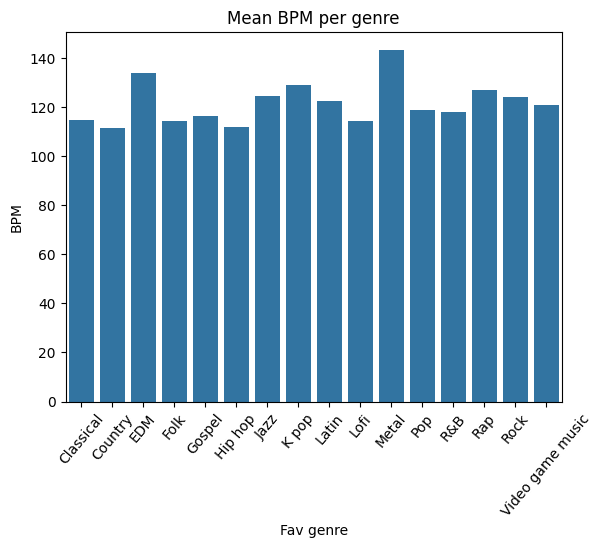

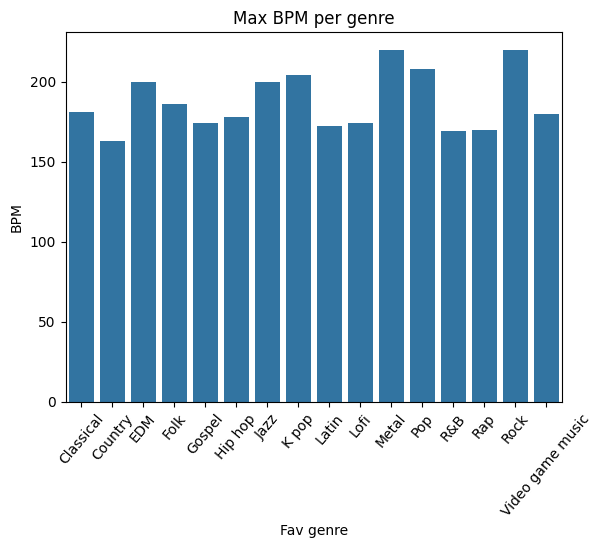

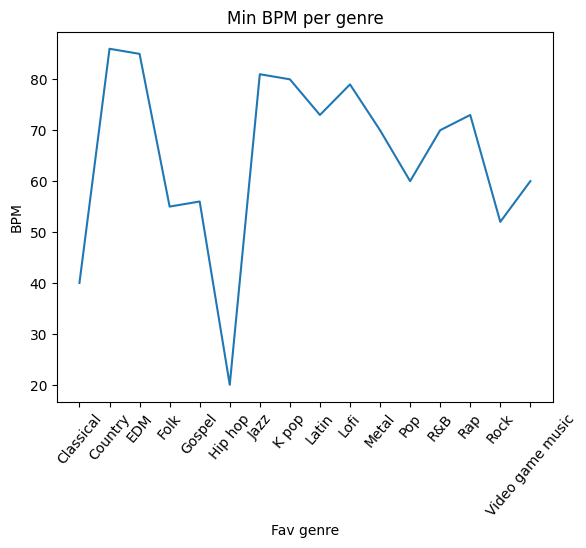

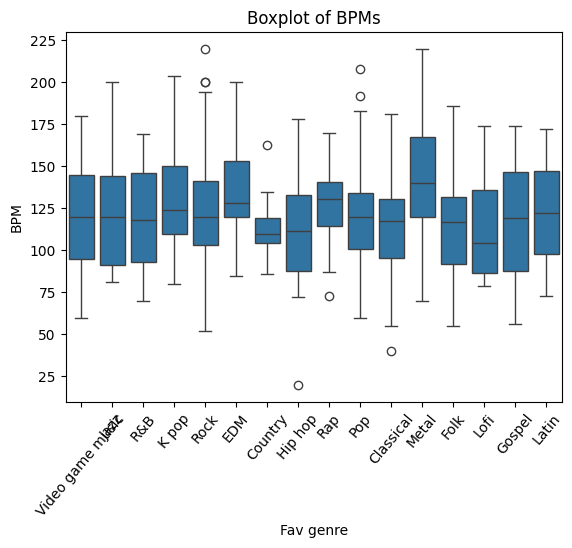

In [46]:
#mean BPM per genre
mean_BPM=df.groupby("Fav genre")["BPM"].mean().reset_index()
sns.barplot(data=mean_BPM, x="Fav genre", y="BPM")
plt.title("Mean BPM per genre")
plt.xticks(rotation=50)
plt.show()
#max BPM per genre
max_BPM=df.groupby("Fav genre")["BPM"].max().reset_index()
sns.barplot(data=max_BPM, x="Fav genre", y="BPM")
plt.title("Max BPM per genre")
plt.xticks(rotation=50)
plt.show()
#min BPM per genre
min_BPM= df.groupby("Fav genre")["BPM"].min().reset_index()
sns.lineplot(data=min_BPM, x="Fav genre", y="BPM")
plt.title("Min BPM per genre")
plt.xticks(rotation=50)
plt.show()

#boxplot of BPMs
sns.boxplot(data=df, x="Fav genre", y="BPM")
plt.title("Boxplot of BPMs")
plt.xticks(rotation=50)
plt.show()

In [25]:
#total number of hours daily per platform
platforms_hours_ttl=df.groupby("Primary streaming service")["Hours per day"].sum()
#average hours users listen to music daily per platform
platforms_hours_avg=df.groupby("Primary streaming service")["Hours per day"].mean()



<Axes: xlabel='Age', ylabel='Hours per day'>

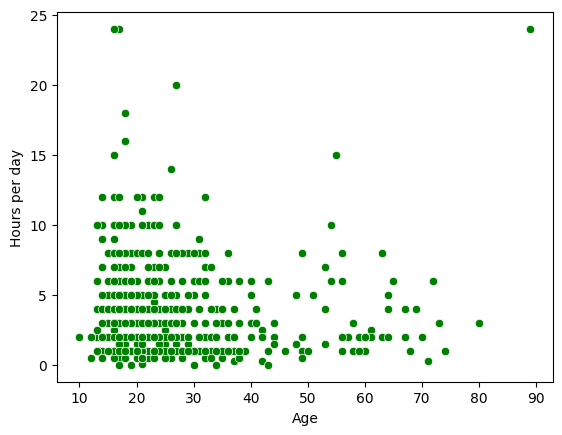

In [27]:
sns.scatterplot(data=df, x="Age", y="Hours per day", color="green")

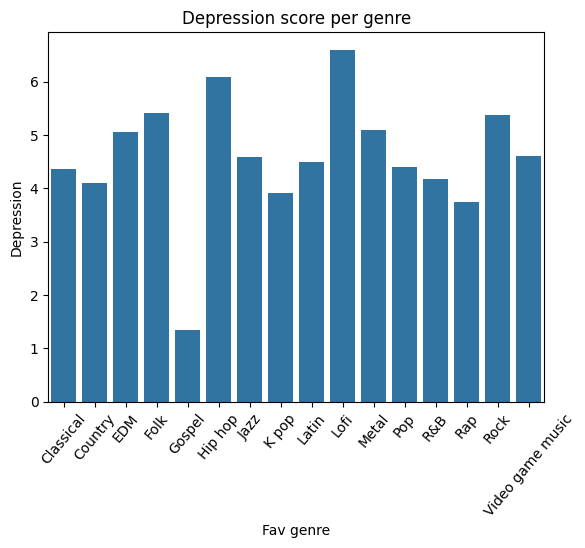

In [47]:
#Favourite music vs depression
music_depression_score=df.groupby("Fav genre")["Depression"].mean().reset_index()
sns.barplot(data=music_depression_score, x="Fav genre", y="Depression")
plt.title("Depression score per genre")
plt.xticks(rotation=50)
plt.show()

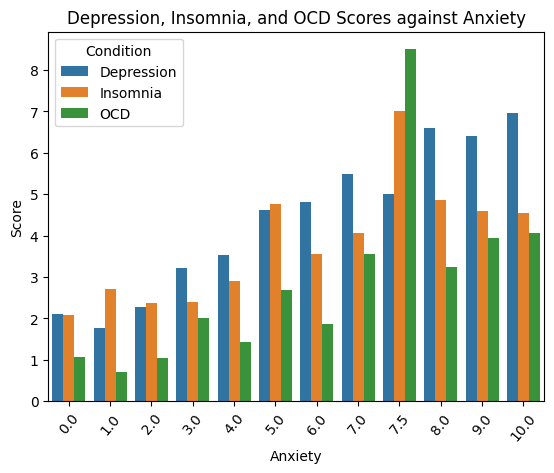

In [52]:
#Seing the correlation between averages of Depression, Insomnia and OCD against anxiety levels
anx_dep_ins_ocd_score=(df.groupby("Anxiety")[["Depression","Insomnia","OCD"]].mean().reset_index())
anx_melted = anx_dep_ins_ocd_score.melt(id_vars="Anxiety", value_vars=["Depression", "Insomnia", "OCD"], var_name="Condition", value_name="Score")
sns.barplot(data=anx_melted, x="Anxiety", y="Score", hue="Condition")
plt.title("Depression, Insomnia, and OCD Scores against Anxiety")
plt.xticks(rotation=50)
plt.show()